In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
with np.load('cifar4-train.npz') as npz_file:
    data = dict(npz_file.items())

print (data.keys())

dict_keys(['pixels', 'overfeat', 'labels', 'names', 'allow_pickle'])


In [3]:
# Create X/y arrays
X = data['pixels']
y = data['labels']
XO = data['overfeat']
names = data['names']

print('Shape of X:', X.shape, X.dtype)
print('Shape of y:', y.shape, y.dtype)
print ('Shape of X (OverFeat):',XO.shape)
print('names:', names)

Shape of X: (5000, 3072) uint8
Shape of y: (5000,) int64
Shape of X (OverFeat): (5000, 4096)
names: ['truck' 'car' 'airplane' 'ship']


# Data Exploration and Visualization

#### Class Distribution

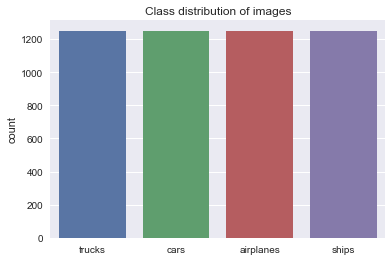

In [4]:
xs = np.arange(4)
x_labels = ['trucks','cars','airplanes','ships']
sns.countplot(data['labels'])
plt.xticks(xs,x_labels)
plt.title('Class distribution of images')
plt.show()

#### Accuracy of 'most-frequent' baseline

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [6]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=1000, random_state=0)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_tr,y_tr)
baseline = dummy.score(X_te,y_te)
print ('Accuracy baseline is: {:.3f}'.format(baseline))

Accuracy baseline is: 0.227


#### Image plotting

In [16]:
def image_plot(num):
    idx = (y == num)
    X_plot,label = X[idx],y[idx]
    fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(13, 2))
    for i,axis in enumerate(axes):
        flat_img = X_plot[i,:]
        img = flat_img.reshape(32, 32, 3)
       
        # Plot array
        axis.imshow(img)
        axis.get_xaxis().set_visible(False) 
        axis.get_yaxis().set_visible(False)
    plt.suptitle('Label: {} ({})'.format(label,names[label]))
    plt.show()

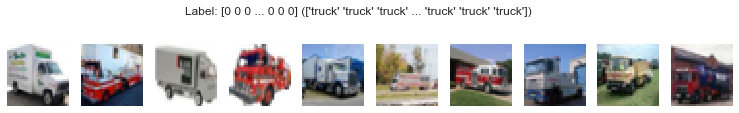

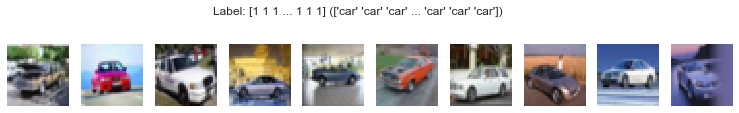

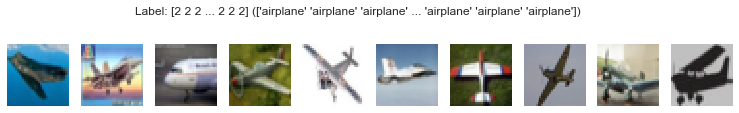

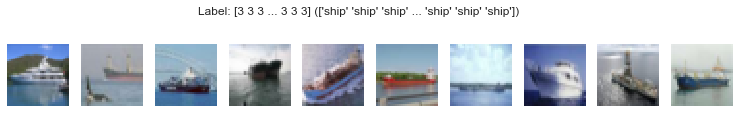

In [19]:
for num in np.arange(0,4):
    image_plot(num)

#### Scree Plot with OverFeat features

In [5]:
from sklearn.decomposition import PCA
#create PCA transformer
pca = PCA(n_components=None)
#apply PCA 
pca.fit(XO,y=None)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
cumsum_first2 = pca.explained_variance_ratio_[0:2].sum()
print ('The cumulated PVE in the 1st 2 components: {:.3f}'.format(cumsum_first2))

The cumulated PVE in the 1st 2 components: 0.250


In [27]:
pve = pca.explained_variance_ratio_

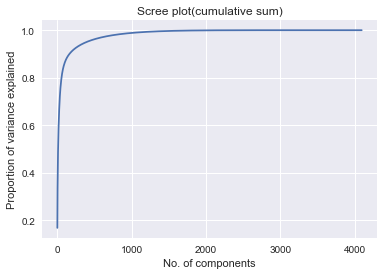

In [31]:
plt.plot(np.cumsum(pve))
plt.xlabel('No. of components')
plt.ylabel('Proportion of variance explained')
plt.title('Scree plot(cumulative sum)')
plt.show()

Based on the curve above, seems that between first 500 to 750 components contain 95% of the variance. I will replot the curve with 500 components 

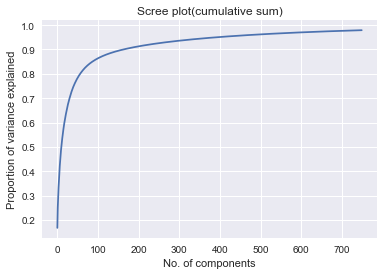

In [33]:
plt.plot(np.cumsum(pve[0:750]))
plt.title('Scree plot(cumulative sum)')
plt.xlabel('No. of components')
plt.ylabel('Proportion of variance explained')
plt.show()

Since we are looking at number of components that can have 99% of the variance explained, looking at the earlier graph, you will need a larger number of components to represent it. Therefore, I have increased the number of components to 1000.

In [37]:
pve1000_cumsum = np.cumsum(pve[0:1000])
results = pd.DataFrame.from_items([('Cum Sum',pve1000_cumsum)]).round(2)

In [38]:
results.tail()

,Cum Sum
995,0.99
996,0.99
997,0.99
998,0.99
999,0.99


In [39]:
lst = [0.80,0.90,0.95,0.99]

for val in lst:
    print ('% of variance explained:',(val*100))
    print (results[results['Cum Sum'] == val].head(2))

% of variance explained: 80.0
    Cum Sum
55      0.8
56      0.8
% of variance explained: 90.0
     Cum Sum
151      0.9
152      0.9
% of variance explained: 95.0
     Cum Sum
355     0.95
356     0.95
% of variance explained: 99.0
     Cum Sum
888     0.99
889     0.99


##### Create 2D plot of the OverFeat Features and Matrix of Image pixels

In [6]:
#overfeat features

#create PCA transformer
pca = PCA(n_components=2)
pca.fit(XO,y=None) #apply pca
XO_2d = pca.transform(XO) #project data onto the first 2 components

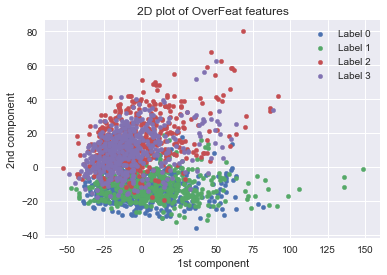

In [11]:
for label in range(4):
    idx = (y == label)
    plot0,plot1 = XO_2d[idx,0],XO_2d[idx,1]
    plt.scatter(plot0[:500],plot1[:500],label='Label {}'.format(label),s=20)

plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('2D plot of OverFeat features')
plt.show()

In [94]:
#Matrix of Image pixels
pca_img = PCA(n_components=2)
pca_img.fit(X,y=None)
X_2d = pca_img.transform(X)

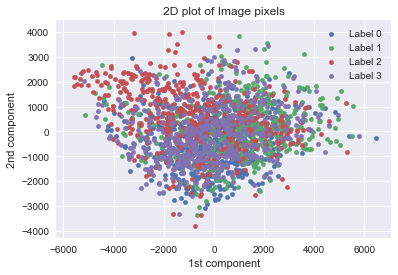

In [102]:
for label in range(4):
    idx = (y == label)
    plot0,plot1 = X_2d[idx,0],X_2d[idx,1]
    plt.scatter(plot0[:500],plot1[:500],label='Label {}'.format(label),s=20)

plt.legend()
plt.title('2D plot of Image pixels')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

Looking at the 2 plots, looks like there's a larger variance in the data of the 'images' set compared to the 'overfeat' set. 